<a href="https://colab.research.google.com/github/couragedike1/Data_Analystics-/blob/main/songs_normalize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [1]:
import pandas as pd #Perform statistical analysis and aggregations.

In [2]:
import numpy as np #library for numerical computing in Python

In [63]:
import matplotlib.pyplot as plt #library used for data visualization

In [64]:
import seaborn as sns #Python data visualization library built on top of matplotlib
!pip install seaborn

#Connect song data to google collab

In [5]:
df=pd.read_csv("songs_normalize.csv")

#Check Data

In [44]:
df.head(100)

artist                                               song  \
0       Britney Spears                             Oops!...I Did It Again   
1            blink-182                               All The Small Things   
2           Faith Hill                                            Breathe   
3             Bon Jovi                                       It's My Life   
4               *NSYNC                                        Bye Bye Bye   
..                 ...                                                ...   
95             Wheatus                                    Teenage Dirtbag   
96  Christina Aguilera  Come on over Baby (All I Want Is You) - Radio ...   
97               Creed                                             Higher   
98      Britney Spears                                              Lucky   
99               Nelly                         Country Grammar (Hot Shit)   

    duration_ms  explicit  year  popularity  danceability  energy  key  \
0        211160     False  2000          77         0.751   0.834    1   
1        167066     False  1999          79         0.434   0.897    0   
2        250546     False  1999          66         0.529   0.496    7   
3        224493     False  2000          78         0.551   0.913    0   
4        200560     False  2000          65         0.614   0.928    8   
..          ...       ...   ...         ...           ...     ...  ...   
95       241666      True  1999          71         0.625   0.850    4   
96       203333     False  1999          64         0.829   0.915    8   
97       316733     False  1999          69         0.459   0.830    2   
98       206226     False  2000          65         0.765   0.791    8   
99       287000      True  2000          68         0.865   0.664    2   

    loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0     -5.444     0       0.0437      0.300000          0.000018    0.3550   
1     -4.918     1       0.0488      0.010300          0.000000    0.6120   
2     -9.007     1       0.0290      0.173000          0.000000    0.2510   
3     -4.063     0       0.0466      0.026300          0.000013    0.3470   
4     -4.806     0       0.0516      0.040800          0.001040    0.0845   
..       ...   ...          ...           ...               ...       ...   
95    -3.904     1       0.0495      0.346000          0.000233    0.1740   
96    -3.205     1       0.1060      0.226000          0.000013    0.2460   
97    -6.254     1       0.0364      0.000051          0.000140    0.2060   
98    -5.707     1       0.0317      0.262000          0.000154    0.0669   
99    -6.822     1       0.1080      0.006890          0.000000    0.1420   

    valence    tempo              genre  
0     0.894   95.053                pop  
1     0.684  148.726          rock, pop  
2     0.278  136.859       pop, country  
3     0.544  119.992        rock, metal  
4     0.879  172.656                pop  
..      ...      ...                ...  
95    0.633   94.661              set()  
96    0.779  118.903                pop  
97    0.431  155.827   pop, rock, metal  
98    0.966   95.026                pop  
99    0.565  162.831  hip hop, pop, R&B  

[100 rows x 18 columns]

In [45]:
df.shape

(2000, 18)

#Descriptive Statistics

In [46]:
# Get info about data types and missing values
print("\n📝 Data Information:")
print(df.info())


📝 Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             200

In [48]:
# Get unique genre and artist count
print("🎵 Unique Genres:", df["genre"].nunique())
print("🎤 Unique Artists:", df["artist"].nunique())
print("⏳song",df["song"].nunique())

🎵 Unique Genres: 59
🎤 Unique Artists: 835
⏳song 1879


In [49]:
# Find the row with the longest song duration
longest_song = df.loc[df["duration_ms"].idxmax()]

# Print result
print(f"🎤 Best Artist: {longest_song['artist']}")
print(f"🎵 Song: {longest_song['song']}")
print(f"⏳ Duration: {longest_song['duration_ms']} ms")

🎤 Best Artist: Justin Timberlake
🎵 Song: Mirrors
⏳ Duration: 484146 ms



# Check for missing values

In [28]:
print(df.isnull().sum())

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64


In [50]:
# Fill missing numerical values with the median
df.fillna(df.select_dtypes(include=np.number).median(), inplace=True)

# Fill missing categorical values with the mode
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

# Verify missing values after filling
print(df.isnull().sum())  # Should now be all zeros


artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64


#Identifying & Treating Outliers

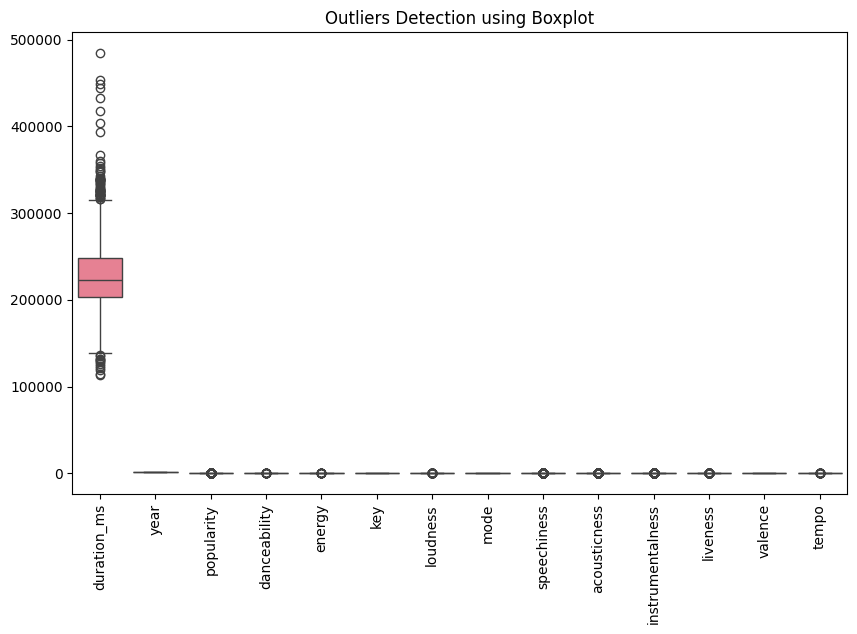

In [51]:
# Detecting outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title("Outliers Detection using Boxplot")
plt.show()

##  Univariate Analysis: Histogram

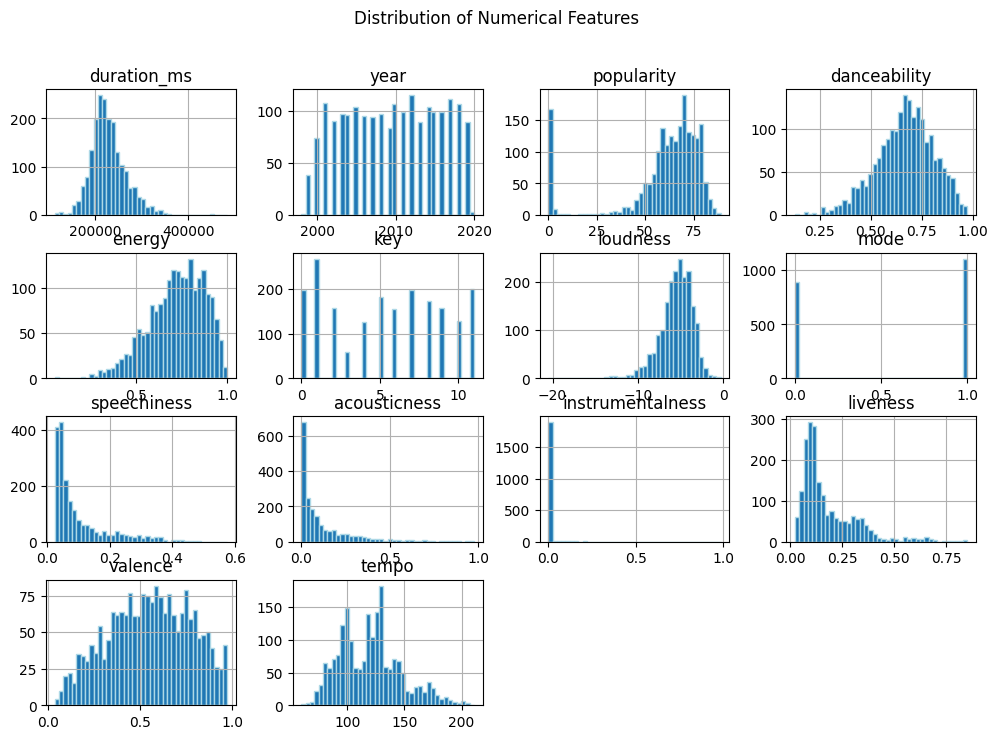

In [52]:
df.hist(figsize=(12, 8), bins=40,edgecolor='lightblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()


# KDE Plot (Density Estimation)

<ipython-input-53-f9fbb35470d0>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["popularity"], shade=True, color="blue")


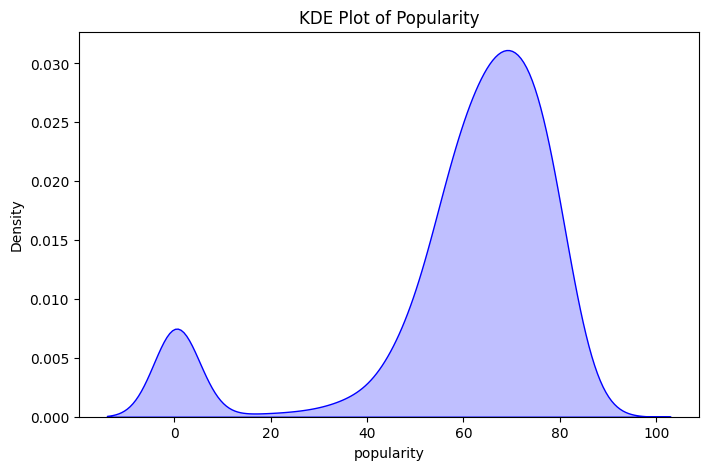

In [53]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df["popularity"], shade=True, color="blue")
plt.title("KDE Plot of Popularity")
plt.show()


# Bivariate Analysis: Scatter plot

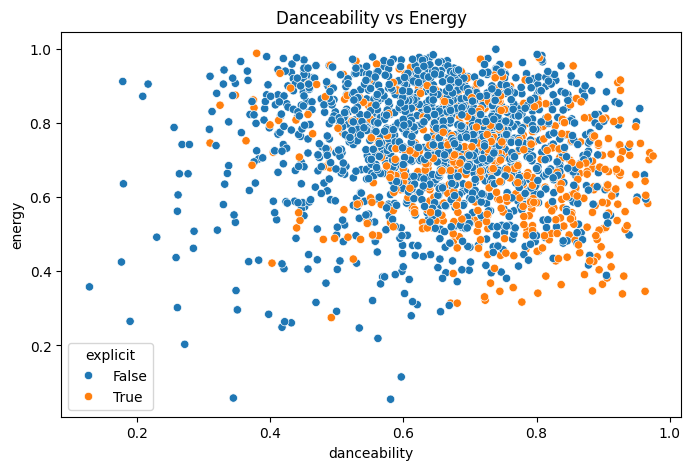

In [55]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["danceability"], y=df["energy"], hue=df["explicit"])
plt.title("Danceability vs Energy")
plt.show()

# Pairplot (numerical features)

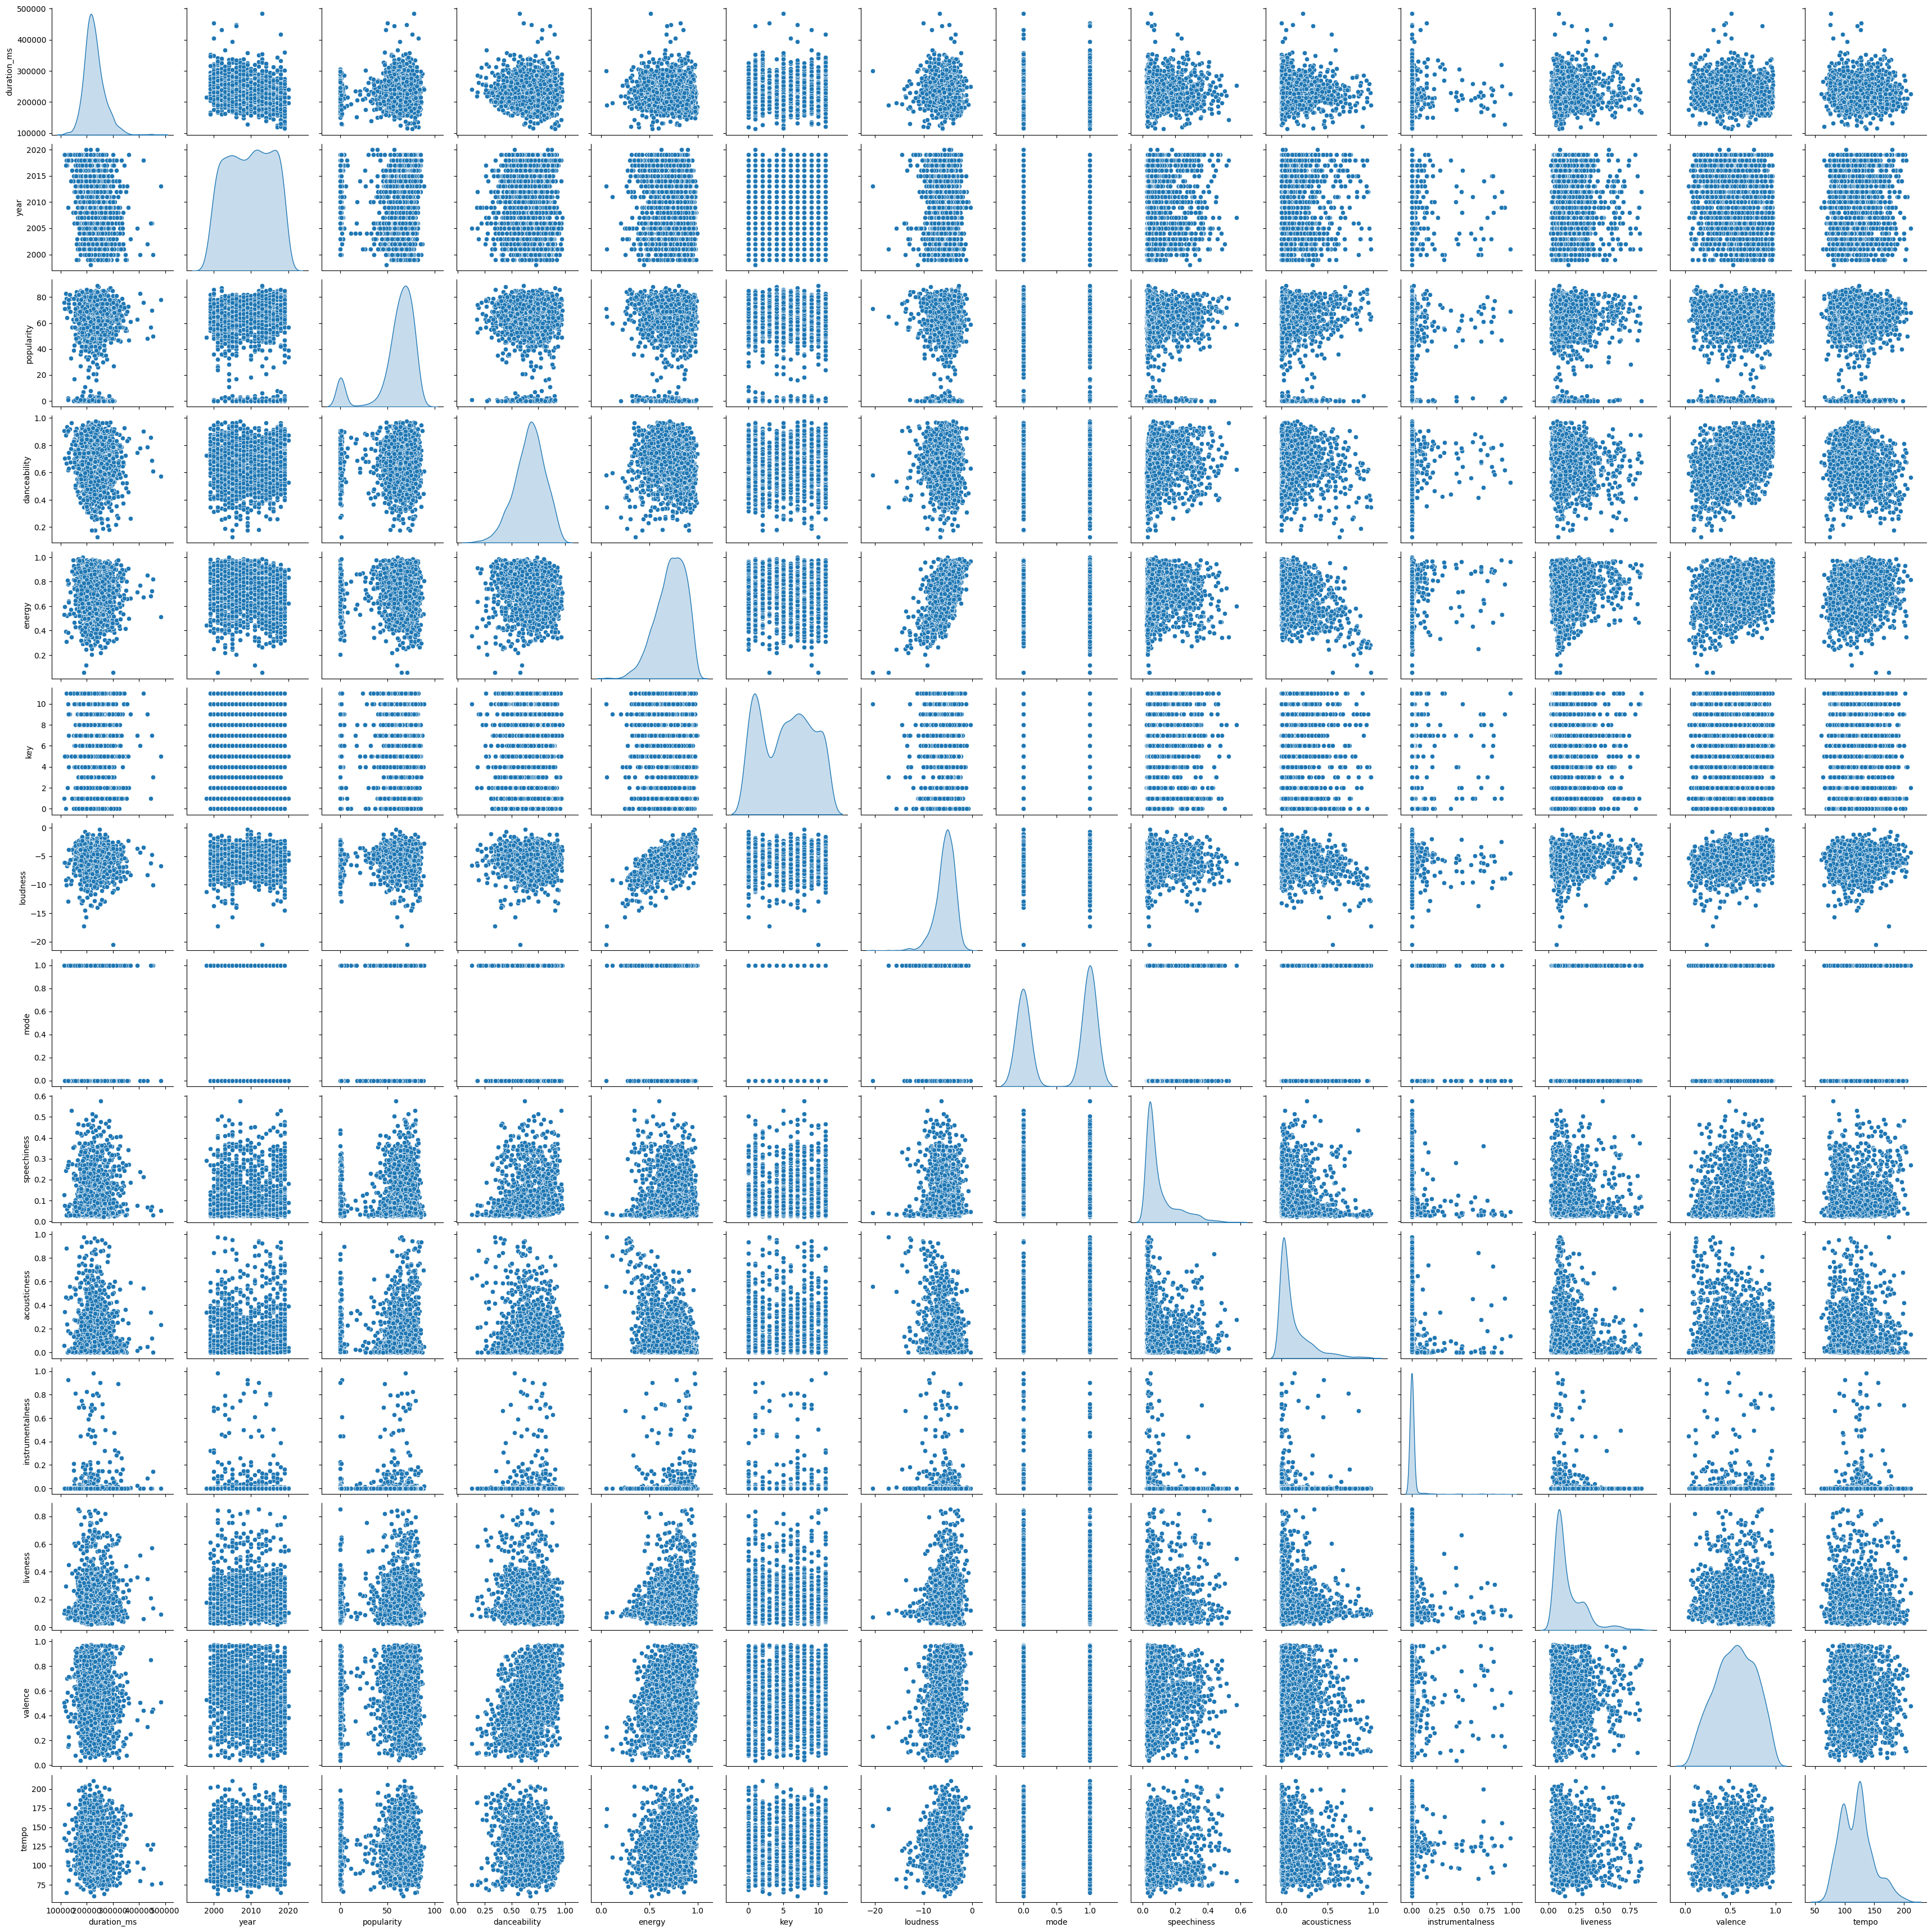

In [57]:
sns.pairplot(df.select_dtypes(include=np.number), diag_kind='kde')
plt.show()

# Count Plot: Genre distribution

<ipython-input-60-aa125767537a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["explicit"], palette="coolwarm")


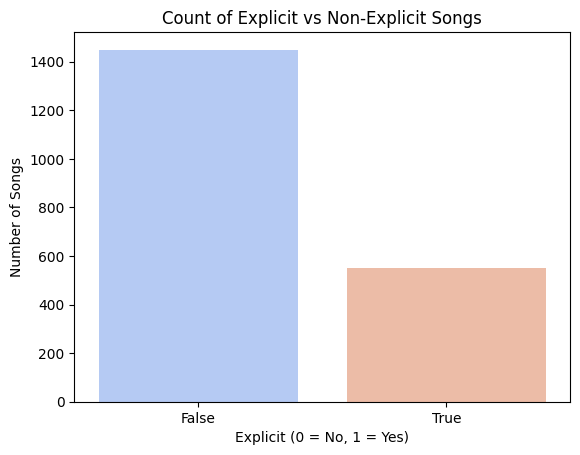

In [60]:
# Create Count Plot
sns.countplot(x=df["explicit"], palette="coolwarm")
plt.xlabel("Explicit (0 = No, 1 = Yes)")
plt.ylabel("Number of Songs")
plt.title("Count of Explicit vs Non-Explicit Songs")
plt.show()

# Correlation heatmap

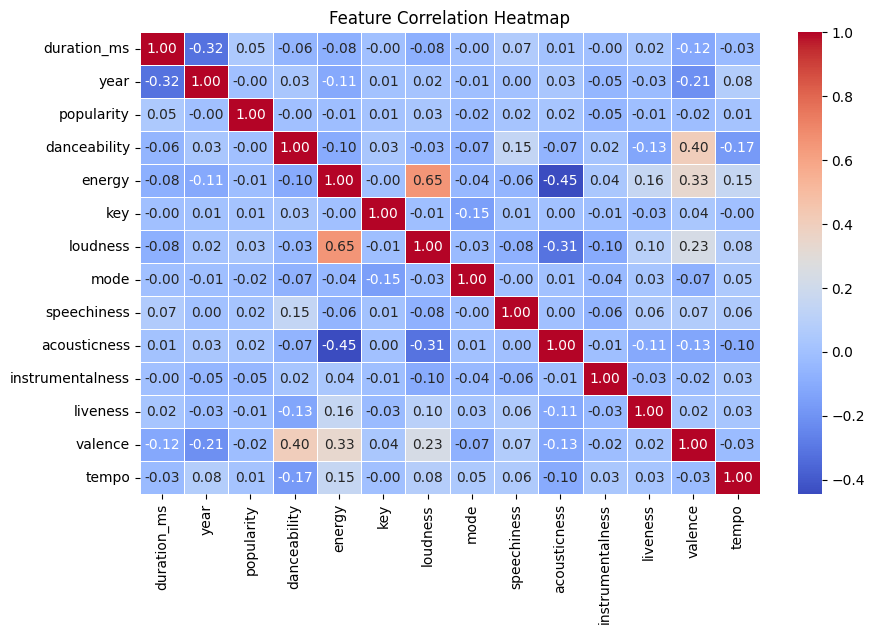

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#Checking skewness

In [18]:
# Check skewness of all numerical columns
print(df.skew(numeric_only=True))

duration_ms         1.018925
explicit            1.005755
year               -0.046205
popularity         -1.824422
danceability       -0.428030
energy             -0.632896
key                -0.009379
loudness           -1.199866
mode               -0.215397
speechiness         1.761877
acousticness        2.094134
instrumentalness    7.581736
liveness            1.848579
valence            -0.128816
tempo               0.546770
dtype: float64


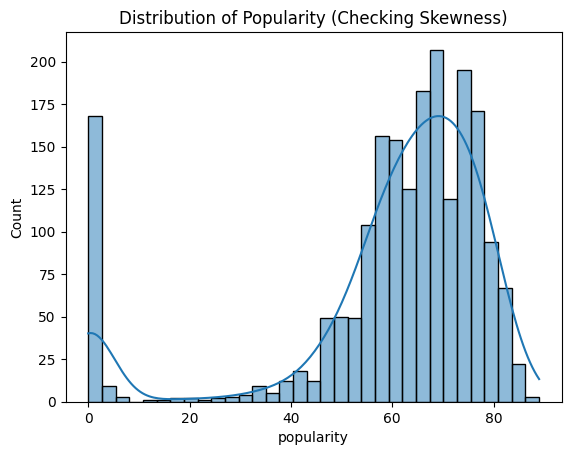

In [61]:
sns.histplot(df["popularity"], kde=True)  # Replace with any numerical column
plt.title("Distribution of Popularity (Checking Skewness)")
plt.show()

<ipython-input-62-c3537270ded6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skew_values.index, y=skew_values.values, palette="coolwarm")


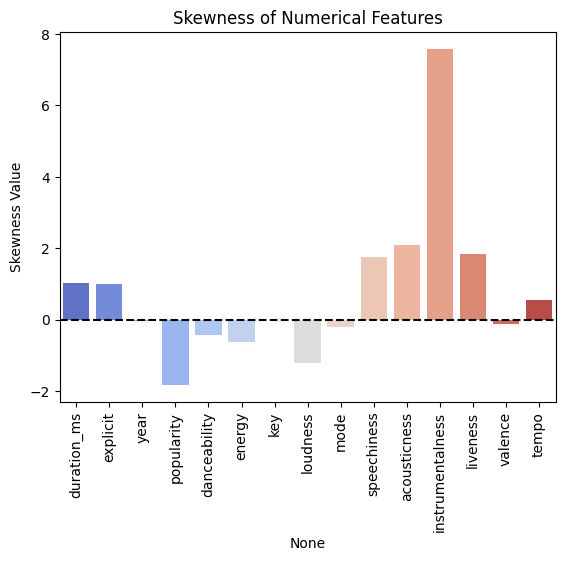

In [62]:
# Skewness calculation
skew_values = df.skew(numeric_only=True)

# Bar plot for skewness
sns.barplot(x=skew_values.index, y=skew_values.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.axhline(y=0, color='black', linestyle='--')  # Reference line at 0
plt.title("Skewness of Numerical Features")
plt.ylabel("Skewness Value")
plt.show()

#Correlation Map

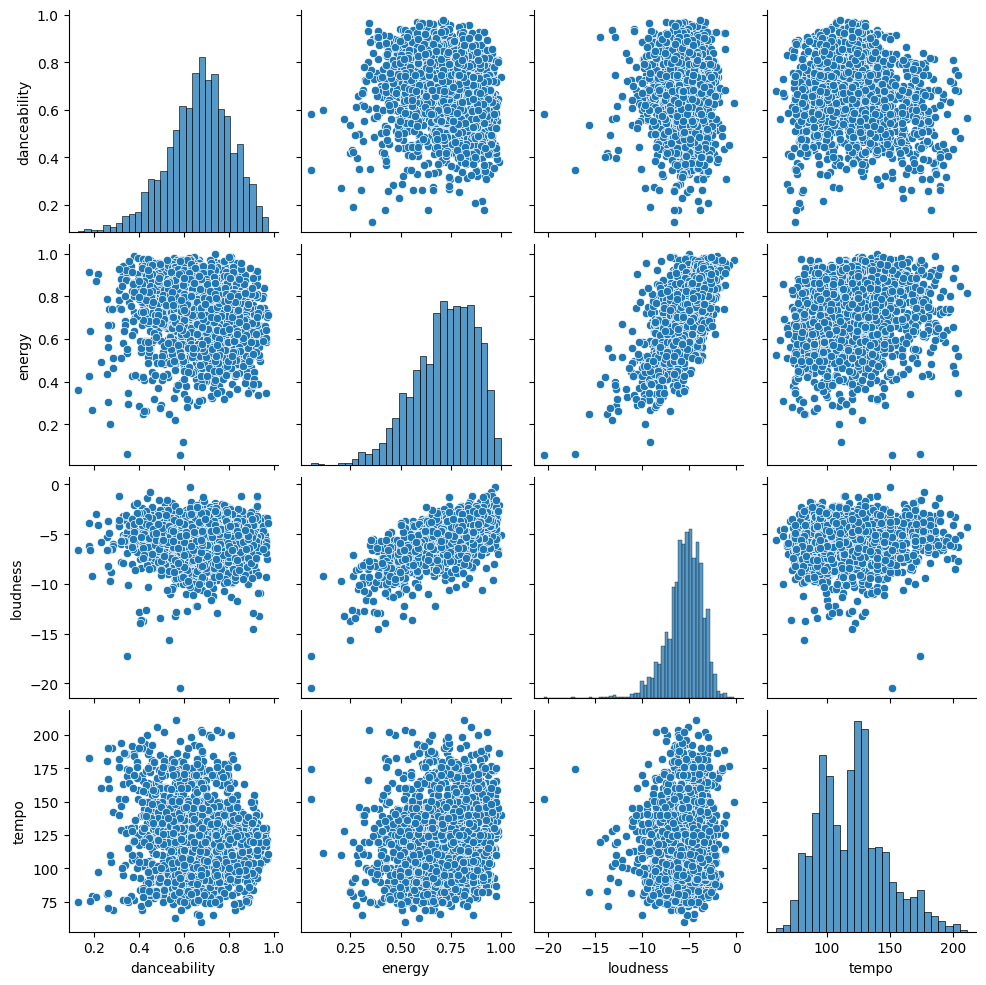

In [42]:
sns.pairplot(df[["danceability", "energy", "loudness", "tempo"]])
plt.show()
